In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt


# Assuming the M5 dataset is stored in a CSV file
data = pd.read_csv('sales_train_evaluation.csv')

product_id = 'HOBBIES_1_001'
product_data = data[data['item_id'].str.contains(product_id)]

product_data_subset = product_data.iloc[:, 4:]

product_data_subset = product_data_subset.reset_index(drop=True)

product_data_subset = product_data_subset.T

dataraw = product_data_subset.iloc[2:,0:]






In [57]:
def rmsse(train, test, forecast):
    forecast_mse = np.mean((test-forecast)**2)
    train_mse = np.mean((np.diff(np.trim_zeros(train), axis=0)**2))
    return np.sqrt(forecast_mse/train_mse)

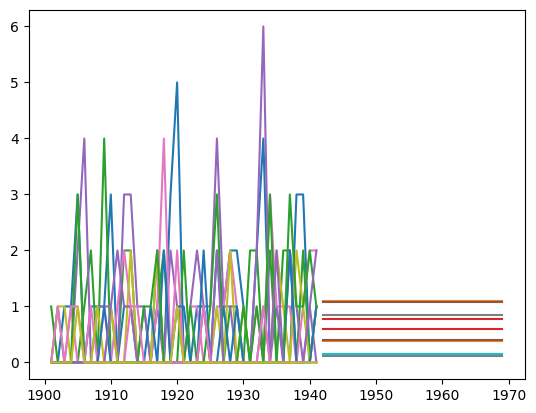

In [6]:
#ETS bottom up

n=10
forecasts = np.zeros((n,28))
for i in range(n):
    # Extract the time series values
    time_series = dataraw.iloc[:,i].to_numpy()
        
    # Perform ETS forecasting on the time series
    model = ExponentialSmoothing(time_series)
    model_fit = model.fit()
    forecast = model_fit.forecast(28)

    forecasts[i,:] = forecast[:]

# Print or use the forecasts as desired

initial = list(range(1901, 1942))
after = range(1942, 1970)

for j in range(n):
    plt.plot(initial,dataraw.iloc[1900:,j].to_numpy())
    plt.plot(after,forecasts[j,:])

plt.show()


#can forecast and reconcile and calculate summed RMSSE






In [4]:
#ETS top down















In [10]:
# Extract the time series values
import sklearn

time_series = dataraw.iloc[:,1]

future = time_series.shift(-1)

future = future.iloc[:-1] 

time_series = time_series.iloc[:-1]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(time_series,future, test_size=0.2, shuffle=False)


X_train=  X_train.astype(float)
X_test=  X_test.astype(float)
y_train=  y_train.astype(float)
y_test=  y_test.astype(float)


1552
1552


In [56]:
#lightbgm
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error


n=1
forecasts = np.zeros((n,28))
for i in range(n):
    
    # Extract the time series values
    time_series = dataraw.iloc[:,i]

    future = time_series.shift(-1)

    future = future.iloc[:-1] 

    time_series = time_series.iloc[:-1]

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(time_series,future, test_size=0.2, shuffle=False)


    X_train=  X_train.astype(float)
    X_test=  X_test.astype(float)
    y_train=  y_train.astype(float)
    y_test=  y_test.astype(float)

    # Define the LightGBM parameters
    params = {'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0}

    X_train = X_train.to_frame().values.reshape(-1, 1)
    X_test = X_test.to_frame().values.reshape(-1, 1)
    y_test = y_test.to_frame().values.reshape(-1, 1)

    # Create a LightGBM dataset from the training set
    train_data = lgb.Dataset(X_train, y_train)

    # # Train the LightGBM model
    model = lgb.train(params, train_data, num_boost_round=100)

    # # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # # Evaluate the model performance
    mae = mean_absolute_error(y_test, y_pred)
    error = rmsse(X_train, y_test, y_pred)
    #print(f"Mean Absolute Error: {mae}")
    print(f"RMSSE: {error}")
    

    # # Forecasting
    # future_periods = 28  # Number of future time periods to forecast
    # forecast = model.predict(X_)


    # forecasts[i,:] = y_pred







[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 